In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("apartments1.csv")

In [4]:
data.head(8)

,title,location,bedrooms,bathrooms,price,rate
0,3 Bedroom Apartment,Riverside_Nairobi,3,3,200000,Per Month
1,3 Bedroom Apartment,Kileleshwa_Nairobi,3,4,70000,Per Month
2,3 Bedroom Apartment,Nyali_Mombasa,3,2,38000,Per Month
3,3 Bedroom Apartment,Lavington_Nairobi,3,3,80000,Per Month
4,1 Bedroom Apartment,Kileleshwa_Nairobi,1,1,110000,Per Month
5,4 Bedroom Apartment,ThikaRd_Nairobi,4,2,57750,Per Month
6,2 Bedroom Apartment,Kilimani_Nairobi,2,3,65000,Per Month
7,3 Bedroom Apartment,Westlands_Nairobi,3,3,78000,Per Month


In [5]:
data.tail(8)

,title,location,bedrooms,bathrooms,price,rate
201,3 Bedroom Apartment,Kikuyu,3,3,55000,Per Month
202,1 Bedroom Apartment,Shanzu_Mombasa,1,1,55000,Per Month
203,2 Bedroom Apartment,Westlands_Nairobi,2,2,75000,Per Month
204,2 Bedroom Apartment,Hurlingham,2,2,75000,Per Month
205,2 Bedroom Apartment,Kileleshwa_Nairobi,2,2,55000,Per Month
206,3 Bedroom Apartment,Kilimani_Nairobi,3,3,75000,Per Month
207,3 Bedroom Apartment,Nyali_Mombasa,3,2,45000,Per Month
208,2 Bedroom Apartment,SpringValley_Nairobi,2,3,65000,Per Month


In [ ]:
#getting the data info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      209 non-null    object
 1   location   209 non-null    object
 2   bedrooms   209 non-null    int64 
 3   bathrooms  209 non-null    int64 
 4   price      209 non-null    int64 
 5   rate       209 non-null    object
dtypes: int64(3), object(3)
memory usage: 9.9+ KB


In [ ]:
#describe the data

In [7]:
data.describe()

,bedrooms,bathrooms,price
count,209.000000,209.000000,209.000000
mean,2.550239,2.435407,88087.320574
std,0.939830,0.979055,63487.623487
min,1.000000,1.000000,5000.000000
25%,2.000000,2.000000,55000.000000
50%,3.000000,2.000000,70000.000000
75%,3.000000,3.000000,80000.000000
max,4.000000,5.000000,300000.000000


In [ ]:
#visualizing the data

In [8]:
import seaborn as sns

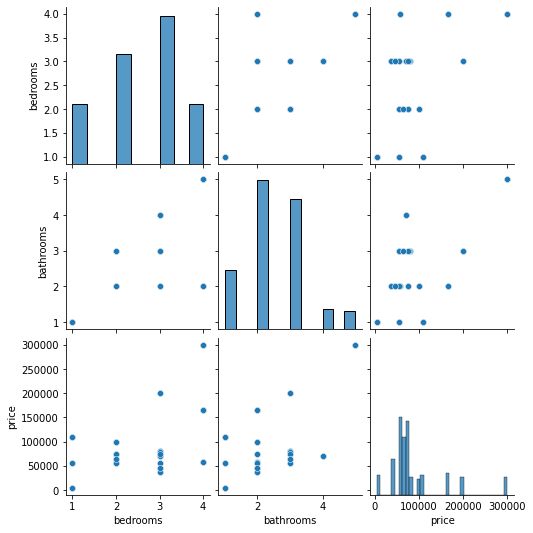

In [9]:
sns.pairplot(data)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

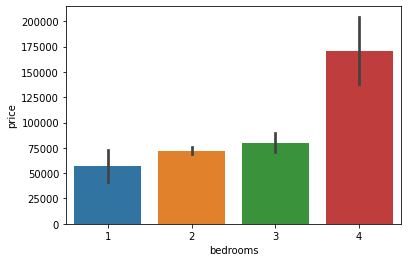

In [10]:
#seeing how the number of bedrooms affecting the price of ana apartment
sns.barplot(x="bedrooms",y="price",data=data)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

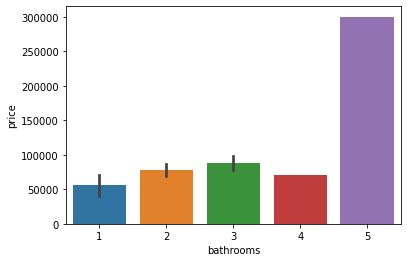

In [11]:
#seeing how the number of bathrooms affecting the price of ana apartment
sns.barplot(x="bathrooms",y="price",data=data)

<AxesSubplot:xlabel='title', ylabel='price'>

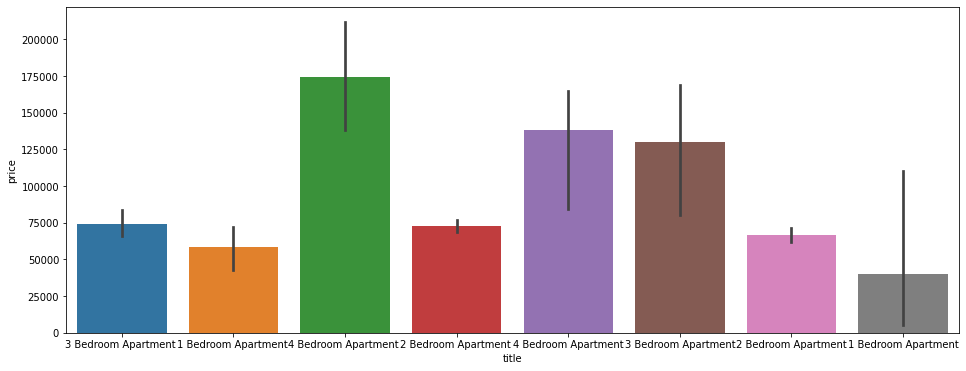

In [15]:
#seeing how the type of the apartment is affecting the price of an apartment
plt.figure(figsize=(16,6))
sns.barplot(x="title",y="price",data=data)

<AxesSubplot:xlabel='location', ylabel='price'>

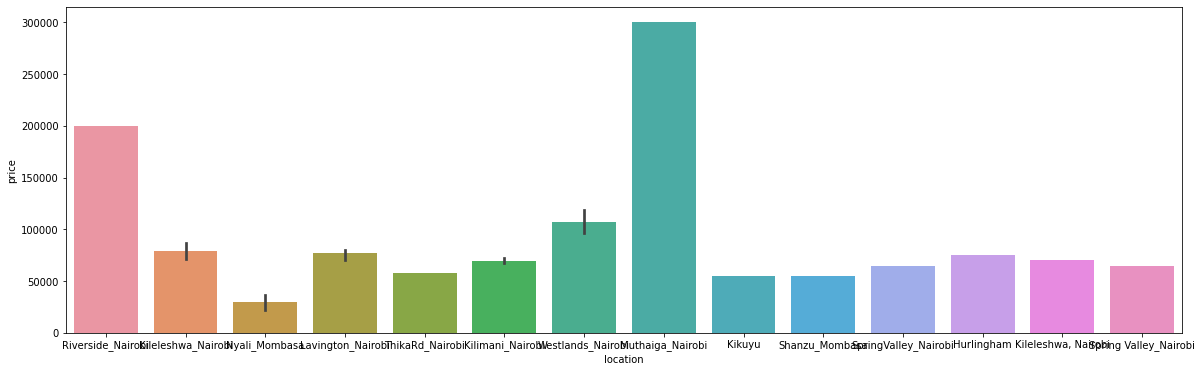

In [16]:
#seeing how the location of the apartment is affecting the price of that apartment
plt.figure(figsize=(20,6))
sns.barplot(x="location",y="price",data=data)

In [17]:
#Building the model
from sklearn import metrics,neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [20]:
#dividing the data
X = data[[
    'title',
    'location',
    'bathrooms',
    'bedrooms',
    'rate',
]].values

In [21]:
y = data[['price']]

In [31]:
#converting categorical data to numeric data
Le = LabelEncoder()
for i in range(len(X[0])):
    X[:, i] = Le.fit_transform(X[:, i])

In [32]:
y = np.array(y)

In [33]:
#the model
knn = neighbors.KNeighborsClassifier(n_neighbors=10,weights='distance')

In [34]:
#splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [35]:
#predictions
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test,prediction)

/home/bil/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [37]:
print("Predictions: ", prediction)
print("Model Accuracy: ", accuracy)

Predictions:  [ 75000  38000  80000   5000 300000  38000  55000  65000  38000  75000
  65000  55000  55000  80000  55000 200000  75000  65000  38000  70000
 165000   5000  78000  75000  75000 300000   5000  55000   5000  70000
 300000   5000 165000  70000  65000  75000  57750  70000  55000  38000
 165000  55000]
Model Accuracy:  0.9523809523809523


In [44]:
#trying our model now....
print("Actual Value: ", y[120])
print("Predicted Value: ", knn.predict(X)[120])
print("Model Accuracy: ", accuracy)

Actual Value:  [75000]
Predicted Value:  75000
Model Accuracy:  0.9523809523809523


In [45]:
#trying our model now....
print("Actual Value: ", y[57])
print("Predicted Value: ", knn.predict(X)[57])
print("Model Accuracy: ", accuracy)

Actual Value:  [75000]
Predicted Value:  75000
Model Accuracy:  0.9523809523809523


In [46]:
#trying our model now....
print("Actual Value: ", y[13])
print("Predicted Value: ", knn.predict(X)[13])
print("Model Accuracy: ", accuracy)

Actual Value:  [55000]
Predicted Value:  55000
Model Accuracy:  0.9523809523809523


In [42]:
#saving our model
from joblib import dump,load

In [43]:
dump(knn,'apartment.joblib')

['apartment.joblib']